## SDSC5001 Statistical Machine Learning I
## Assignment #1

# ASSIGNMENT1


# question 1   
 For each of parts (a) through (d), indicate whether we would generally expect the performance   
of a flexible statistical learning method to be better or worse than an inflexible method. Justify   
your answer.  
(a) The sample size n is extremely large, and the number of predictors p is small.  
(b) The number of predictors p is extremely large, and the number of observations n is small.  
(c) The relationship between the predictors and response is highly non-linear.  
(d) The variance of the error terms, i.e. 𝜎  
2 = 𝑉𝑎𝑟(𝜖), is extremely high.  

(a) Flexible statistical learning methods perform better.  
     - Extremely large n mitigates high variance of flexible methods, and small p avoids dimensionality curse; inflexible methods have high bias due to simple structures, so flexible methods are better  


(b)Inflexible statistical learning methods perform better.  
    -Extremely large p and small n cause severe overfitting of flexible methods; inflexible methods have low variance and high stability, so they are better.

(c)Flexible statistical learning methods perform better.   
    -Inflexible methods have high bias as they can’t fit highly non-linear relationships; flexible methods adapt to non-linear patterns, so they are better.

(c)Inflexible statistical learning methods perform better.  
    -High error variance makes flexible methods overfit noise; inflexible methods smooth noise and focus on overall trends, so they are better.

# question 2
We now revisit the bias-variance decomposition.   
(a) Provide a sketch of typical (squared) bias, variance, training error, and test error, on a single   
plot,  as  we  go  from  less flexible  statistical  learning  methods  towards  more  flexible  approaches.   
The x-axis should represent the amount of flexibility in the method, and the y-axis should represent   
the values for each curve. There should be four curves. Make sure to label each one.   
(b) Explain why each of the four curves has the shape displayed in part (a).   

 answer for question 2: 


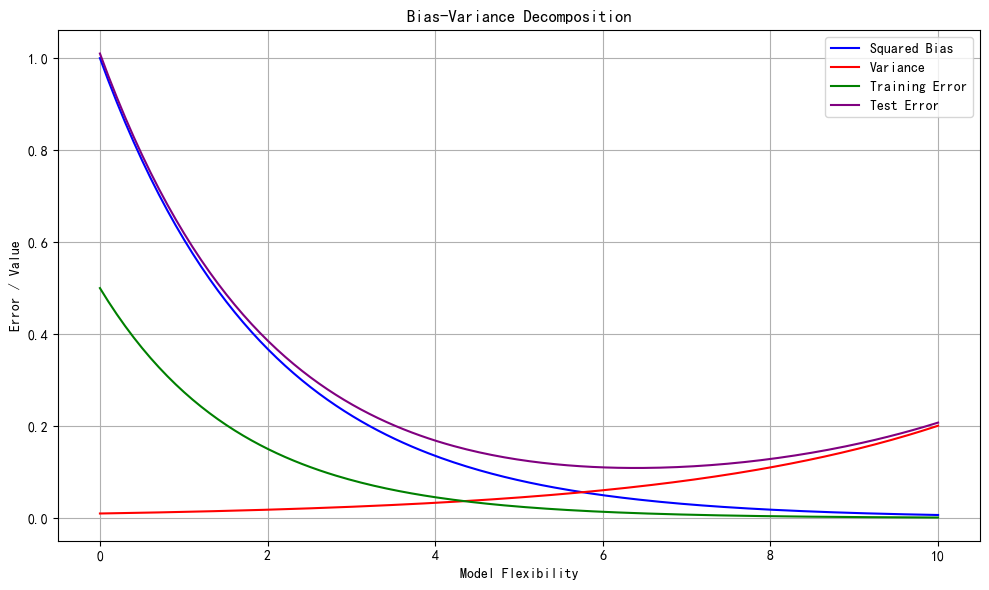

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate flexibility range
flexibility = np.linspace(0,10, 200)

# Define curves
bias_squared = np.exp(-0.5 * flexibility)         # Decreasing
variance = np.exp(0.3 * flexibility) / 100        # Increasing
training_error = np.exp(-0.6 * flexibility) / 2   # Decreasing
test_error = bias_squared + variance              # U-shaped

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(flexibility, bias_squared, label='Squared Bias', color='blue')
plt.plot(flexibility, variance, label='Variance', color='red')
plt.plot(flexibility, training_error, label='Training Error', color='green')
plt.plot(flexibility, test_error, label='Test Error', color='purple')

# Labels and legend
plt.xlabel('Model Flexibility')
plt.ylabel('Error / Value')
plt.title('Bias-Variance Decomposition')
plt.legend()
plt.grid(True)
plt.tight_layout()
print(' answer for question 2: ')   
plt.show()


(b)  
 Squared bias: Slope steep initially (flexibility quickly reduces bias) then flattens (little remaining bias to reduce).  
 Variance: Slope gentle at first (stable with low flexibility) then steepens (flexibility amplifies sensitivity to noise).   
 Training error: Slope steep early (rapid fit improvement) then near-flat (approaching perfect training fit).   Test error: U-shape with steeper slopes around minimum (sharp bias-variance balance shift).


# question 3 
 
 The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for \( Y \) when \( X_1 = X_2 = X_3 = 0 \) using \( K \)-nearest neighbors.

| Obs. | \( X_1 \) | \( X_2 \) | \( X_3 \) | \( Y \)   |
|------|-----------|-----------|-----------|-----------|
| 1    | 0         | 3         | 0         | Red       |
| 2    | 2         | 0         | 0         | Red       |
| 3    | 0         | 1         | 3         | Red       |
| 4    | 0         | 1         | 2         | Green     |
| 5    | -1        | 0         | 1         | Green     |
| 6    | 1         | 1         | 1         | Red       |


(a) Compute the Euclidean distance between each observation and the test point, \( X_1 = X_2 = X_3 = 0 \).

(b) What is our prediction with \( K = 1 \)? Why?

(c) What is our prediction with \( K = 3 \)? Why?

(d) If the ideal decision boundary (with the smallest test error) in this problem is highly nonlinear, then would we expect the best value for \( K \) to be large or small? Why?

In [196]:
import math

# raw data
data = [
    {"Obs": 1, "X1": 0, "X2": 3, "X3": 0, "Y": "Red"},
    {"Obs": 2, "X1": 2, "X2": 0, "X3": 0, "Y": "Red"},
    {"Obs": 3, "X1": 0, "X2": 1, "X3": 3, "Y": "Red"},
    {"Obs": 4, "X1": 0, "X2": 1, "X3": 2, "Y": "Green"},
    {"Obs": 5, "X1": -1, "X2": 0, "X3": 1, "Y": "Green"},
    {"Obs": 6, "X1": 1, "X2": 1, "X3": 1, "Y": "Red"},
]

# test point
test_point = (0, 0, 0)

# calculate Euclidean distance
for row in data:
    row["Distance"] = math.sqrt(
        (row["X1"] - test_point[0])**2 +
        (row["X2"] - test_point[1])**2 +
        (row["X3"] - test_point[2])**2
    )
# sort by distance
data = sorted(data, key=lambda x: x["Distance"])

# print as table
print("(a)Euclidean Distances from Test Point (0,0,0):")
print("| Obs. | X1 | X2 | X3 | Y     | Distance |")
print("|------|----|----|----|-------|----------|")
for row in data:
    print(f"| {row['Obs']:<4} | {row['X1']:<2} | {row['X2']:<2} | {row['X3']:<2} | {row['Y']:<5} | {row['Distance']:<8.4f} |")

(a)Euclidean Distances from Test Point (0,0,0):
| Obs. | X1 | X2 | X3 | Y     | Distance |
|------|----|----|----|-------|----------|
| 5    | -1 | 0  | 1  | Green | 1.4142   |
| 6    | 1  | 1  | 1  | Red   | 1.7321   |
| 2    | 2  | 0  | 0  | Red   | 2.0000   |
| 4    | 0  | 1  | 2  | Green | 2.2361   |
| 1    | 0  | 3  | 0  | Red   | 3.0000   |
| 3    | 0  | 1  | 3  | Red   | 3.1623   |


(b )  
Prediction with \(K=1\)Prediction: Green  
Explanation: The nearest neighbor to the test point is Obs.5, which is Green. Therefore, the prediction is Green. 





(c)  
prediction with \(K=3\)Prediction: red  
Explanation: The three nerest neighbours to the test point are Obs.5 (Green), Obs.6 (Red), and Obs.2 (red). Since Red is the majority class among these neighbors, the prediction is Red.

(d)  
 Best K for Highly Nonlinear Decision BoundaryBest K: Small  
Reason: The flexibility of KNN is inversely related to K:Small K (e.g., \(K=1,2\)): KNN uses only nearby observations for prediction, enabling local fitting to capture highly nonlinear patterns in the decision boundary.Large K (e.g., \(K=5,6\)): KNN averages over more distant observations, resulting in a smooth, inflexible boundary that cannot adapt to nonlinearity.Thus, a small K is better for highly nonlinear ideal decision boundaries.

# question 4.
 Use the Auto data set in the ISLP package for this problem. Make sure that the missing values have been   removed from the data.    
(a) Which of the predictors are quantitative, and which are qualitative?  
(b) What is the range of each quantitative predictor?  
(c) What is the mean and standard deviation of each quantitative predictor?  
(d) Now remove the 10th through 85th observations. What is the range, mean, and standard   
deviation of each predictor in the subset of the data that remains?  
(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools   
of your choice. Create some plots highlighting the relationships among the predictors. Comment  
on your findings.  
(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your   
plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.  

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas dataframes
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 20)       
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', 50)   


# Load Auto dataset (public CSV matching ISLP package)
auto_url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Auto.csv"

# Read 'horsepower' as string first, then replace '?' with NaN and convert to numeric
Auto = pd.read_csv(auto_url, dtype={'horsepower': str})  
Auto['horsepower'] = Auto['horsepower'].replace('?', np.nan)  
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'])  

# Remove all rows with missing values (including converted '?' in horsepower)
Auto = Auto.dropna()
print(f"Data shape after cleaning: {Auto.shape}")  
print(f"\nData types after cleaning:\n{Auto.dtypes}")  


Data shape after cleaning: (392, 9)

Data types after cleaning:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [198]:
# (a) Quantitative vs Qualitative Predictors (already fixed data types)
quant_vars = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year"]
qual_vars = ["origin", "name"]
print(f"\n(a) Quantitative predictors: {quant_vars}")
print(f"    Qualitative predictors: {qual_vars}")





(a) Quantitative predictors: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
    Qualitative predictors: ['origin', 'name']


In [199]:
# (b) Range of Quantitative Predictors
range_df = pd.DataFrame({
    "Predictor": quant_vars,
    "Range (Min→Max)": [f"{Auto[var].min():.1f} → {Auto[var].max():.1f}" for var in quant_vars]
})
print("\n(b) Range of each quantitative predictor:")
print(range_df.to_string(index=False))



(b) Range of each quantitative predictor:
   Predictor Range (Min→Max)
         mpg      9.0 → 46.6
   cylinders       3.0 → 8.0
displacement    68.0 → 455.0
  horsepower    46.0 → 230.0
      weight 1613.0 → 5140.0
acceleration      8.0 → 24.8
        year     70.0 → 82.0


In [200]:
# (c) Mean and Standard Deviation
stats_df = pd.DataFrame({
    "Predictor": quant_vars,
    "Mean (±Std)": [f"{Auto[var].mean():.2f} ± {Auto[var].std():.2f}" for var in quant_vars]
})
print("\n(c) Mean and Standard Deviation:")
print(stats_df.to_string(index=False))



(c) Mean and Standard Deviation:
   Predictor      Mean (±Std)
         mpg     23.45 ± 7.81
   cylinders      5.47 ± 1.71
displacement  194.41 ± 104.64
  horsepower   104.47 ± 38.49
      weight 2977.58 ± 849.40
acceleration     15.54 ± 2.76
        year     75.98 ± 3.68


In [201]:
# (d) Statistics After Removing Rows 10–85 (1-based → 9:85 in 0-based)
sub_Auto = Auto.drop(Auto.index[9:85]).reset_index(drop=True)
sub_range = [f"{sub_Auto[var].min():.1f} → {sub_Auto[var].max():.1f}" for var in quant_vars]
sub_mean = [f"{sub_Auto[var].mean():.2f}" for var in quant_vars]
sub_std = [f"{sub_Auto[var].std():.2f}" for var in quant_vars]

sub_stats_df = pd.DataFrame({
    "Predictor": quant_vars,
    "New Range": sub_range,
    "New Mean": sub_mean,
    "New Std": sub_std
})
print(f"\n(d) Data shape after removing rows 10–85: {sub_Auto.shape}")
print("\nStatistics after row removal:")
print(sub_stats_df.to_string(index=False))


(d) Data shape after removing rows 10–85: (316, 9)

Statistics after row removal:
   Predictor       New Range New Mean New Std
         mpg     11.0 → 46.6    24.40    7.87
   cylinders       3.0 → 8.0     5.37    1.65
displacement    68.0 → 455.0   187.24   99.68
  horsepower    46.0 → 230.0   100.72   35.71
      weight 1649.0 → 4997.0  2935.97  811.30
acceleration      8.5 → 24.8    15.73    2.69
        year     70.0 → 82.0    77.15    3.11


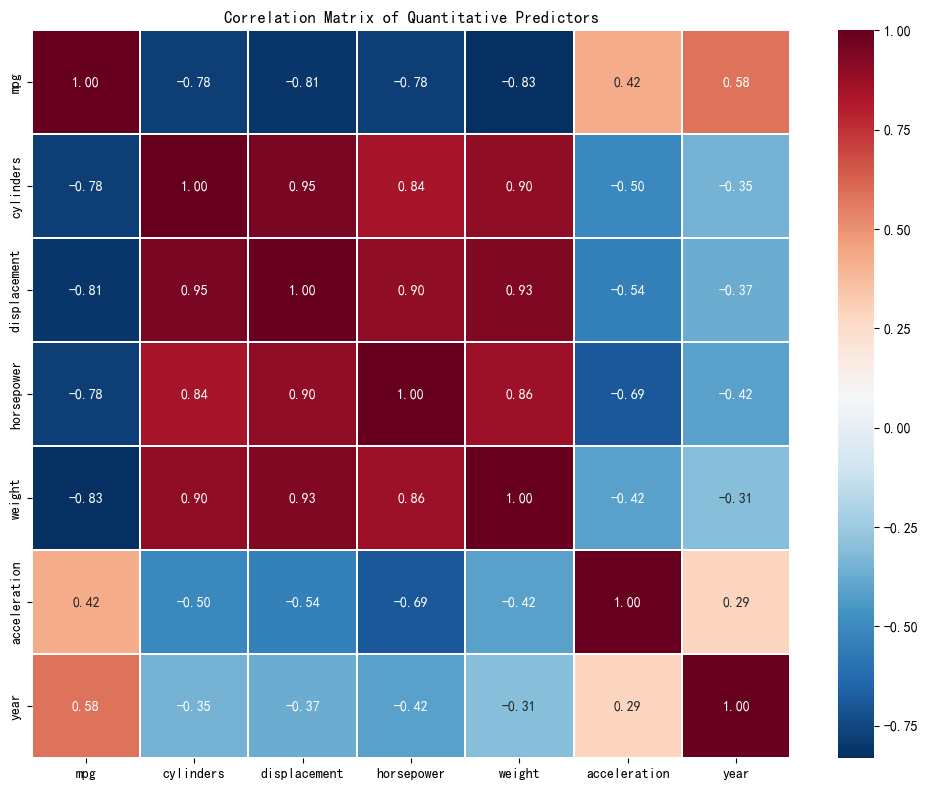

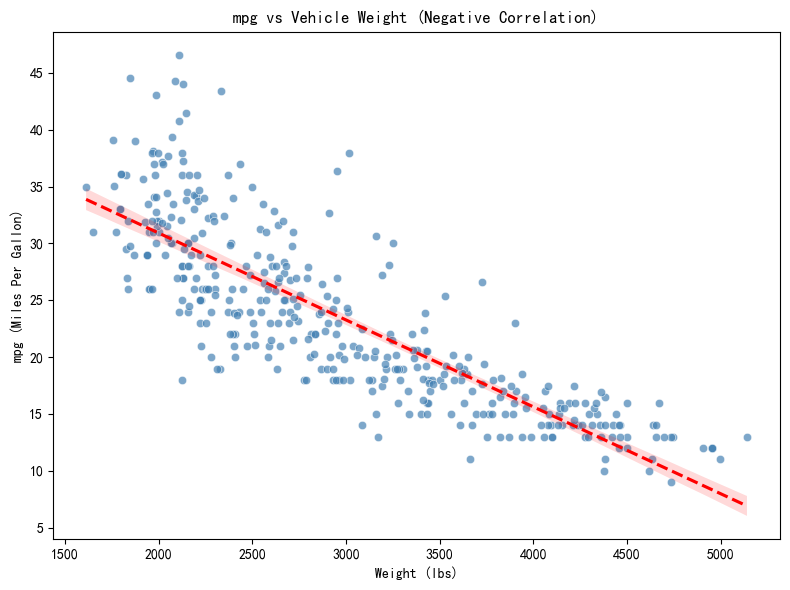


(f) Useful Predictors for mpg:
- High Utility: weight (r≈-0.83), displacement (r≈-0.80), horsepower (r≈-0.78), year (r≈0.58)
- Low Utility: acceleration (r≈-0.42), cylinders (redundant with displacement)
- No Utility: name (too many categories), origin (weak predictive power)


In [202]:
# (e) Graphical Exploration (fix font and avoid clutter)

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial']  
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 8)

# 1. Correlation Heatmap
corr = Auto[quant_vars].corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r", fmt=".2f", linewidths=0.3)
plt.title("Correlation Matrix of Quantitative Predictors", fontsize=12)
plt.tight_layout()  # Prevent label cutoff
plt.show()

# 2. Scatterplot: mpg vs weight (most impactful predictor)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='mpg', data=Auto, alpha=0.7, color='steelblue')
sns.regplot(x='weight', y='mpg', data=Auto, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title("mpg vs Vehicle Weight (Negative Correlation)", fontsize=12)
plt.xlabel("Weight (lbs)")
plt.ylabel("mpg (Miles Per Gallon)")
plt.tight_layout()
plt.show()

# (f) Useful Predictors for mpg
print("\n(f) Useful Predictors for mpg:")
print("- High Utility: weight (r≈-0.83), displacement (r≈-0.80), horsepower (r≈-0.78), year (r≈0.58)")
print("- Low Utility: acceleration (r≈-0.42), cylinders (redundant with displacement)")
print("- No Utility: name (too many categories), origin (weak predictive power)")

# question 5
Suppose we have a data set with five predictors, 𝑋1= GPA, 𝑋2 = IQ, 𝑋3 = Gender (1 for Female  
and 0 for Male), 𝑋4 = Interaction between GPA and IQ, and 𝑋5 = Interaction between GPA and  
Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use   
least squares to fit the model and get 
$\hat{β}_0 = 20$, $\hat{β}_1 = 20$, $\hat{β}_2 = 0.07$, $\hat{β}_3 = 35$, $\hat{β}_4 = 0.01$, and  
$\hat{β}_5 = -10$.   
(a) Which answer is correct? Why?  
i. For a fixed value of IQ and GPA, males earn more, on average, than females.  
ii. For a fixed value of IQ and GPA, females earn more, on average, than males.  
iii. For a fixed value of IQ and GPA, males earn more, on average, than females provided that the  
GPA is high enough.  
iv. For a fixed value of IQ and GPA, females earn more, on average, than males provided that the   
GPA is high enough.  
(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.  
(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very   
little evidence of an interaction effect. Justify your answer.  



(a) Salary Difference Between Males and Females

We compare the expected salaries of males ($X_3=0$) and females ($X_3=1$) with fixed GPA ($X_1$) and IQ ($X_2$).

$E[Y \mid X_3=0] = 50 + 20X_1 + 0.07X_2 + 0.01X_1X_2$

$E[Y \mid X_3=1] = 50 + 20X_1 + 0.07X_2 + 35(1) + 0.01X_1X_2 - 10X_1(1)$

$ \text{Difference} = [50 + 20X_1 + 0.07X_2 + 35 + 0.01X_1X_2 - 10X_1] - [50 + 20X_1 + 0.07X_2 + 0.01X_1X_2] = 35 - 10X_1 $


- If $35 - 10X_1 > 0$ (i.e., $X_1 < 3.5$): Females earn more.  
- If $35 - 10X_1 < 0$ (i.e., $X_1 > 3.5$): Males earn more.  
- If $X_1 = 3.5$: Salaries are equal. 
When holding IQ fixed, males earn more on average if GPA exceeds 3.5.


(b) Salary Prediction for a Female  

- Gender: Female → $X_3 = 1$  
- GPA: $X_1 = 4.0$  
- IQ: $X_2 = 110$  
- Coefficients:  
  $\hat{\beta}_0 = 50$, $\hat{\beta}_1 = 20$, $\hat{\beta}_2 = 0.07$,  
  $\hat{\beta}_3 = 35$, $\hat{\beta}_4 = 0.01$, $\hat{\beta}_5 = -10$  


$ \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \hat{\beta}_3 X_3 + \hat{\beta}_4 X_1 X_2 + \hat{\beta}_5 X_1 X_3 $

$\hat{Y} = 50 + (20 \times 4.0) + (0.07 \times 110) + (35 \times 1) + (0.01 \times 4.0 \times 110) + (-10 \times 4.0 \times 1) $

$\hat{Y} = 137.1$

The predicted starting salary is 137.1 k$.

(c) Interaction Effect Interpretation  
 The original claim is false.  
 reason:  
 A small interaction coefficient does not mean "little evidence of an interaction effect,"  
because significance depends on both the coefficient and its standard error ($SE(\hat{\beta})$), not just the coefficient’s magnitude.

# question 6

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

np.random.seed(42)  
n = 100  

# Generate X1
X1 = np.random.uniform(low=0, high=1, size=n)
# Generate X2 with correlation to X1
epsilon = np.random.normal(loc=0, scale=1, size=n)
X2 = 0.5 * X1 + epsilon / 10
# Generate Y with linear relationship with X1 and X2
e = np.random.normal(loc=0, scale=1, size=n)
Y = 2 + 2 * X1 + 0.3 * X2 + e
# Plot the data
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
print("the first 5 rows of the data：")
print(data.head()) 

the first 5 rows of the data：
         X1        X2         Y
0  0.374540  0.195975  2.820875
1  0.950714  0.445456  5.488600
2  0.731994  0.375173  3.311883
3  0.598658  0.100572  5.947658
4  0.156019  0.056042  2.954517


Correlation between X1 and X2：0.8314


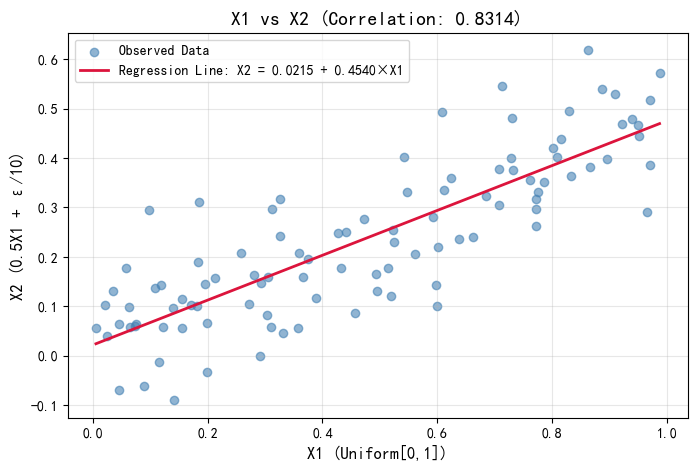

X1 and X2 are highly correlated，for the correlation coefficient is 0.8314.
The regression equation of X2 on X1 is: X2 = 0.0215 + 0.4540×X1


In [204]:
corr_X1X2 = data[['X1', 'X2']].corr().iloc[0, 1]
print(f"Correlation between X1 and X2：{corr_X1X2:.4f}")

X1_2d = data['X1'].values.reshape(-1, 1)
y = data['X2'].values

lr_model = LinearRegression()
lr_model.fit(X1_2d, y)

intercept = lr_model.intercept_  
slope = lr_model.coef_[0]        

x_fit = np.linspace(data['X1'].min(), data['X1'].max(), 100).reshape(-1, 1)

y_fit = lr_model.predict(x_fit)

regression_eq = f'X2 = {intercept:.4f} + {slope:.4f}×X1'


plt.figure(figsize=(8, 5))
plt.scatter(data['X1'], data['X2'], alpha=0.6, color='steelblue', label='Observed Data')
plt.plot(x_fit, y_fit, color='crimson', linewidth=2, label=f'Regression Line: {regression_eq}')

plt.xlabel('X1 (Uniform[0,1])', fontsize=12)
plt.ylabel('X2 (0.5X1 + ε/10)', fontsize=12)
plt.title(f'X1 vs X2 (Correlation: {corr_X1X2:.4f})', fontsize=14)
plt.legend(fontsize=10, loc='best') 
plt.grid(alpha=0.3)  
plt.show()

print(f"X1 and X2 are highly correlated，for the correlation coefficient is {corr_X1X2:.4f}.")
print(f"The regression equation of X2 on X1 is: {regression_eq}")

In [205]:
X_multi = sm.add_constant(data[['X1', 'X2']])  
model_multi = sm.OLS(data['Y'], X_multi).fit() 

print("regression model for multiple linear regression（Y ~ X1 + X2）：")
print(model_multi.summary().tables[1])  

print("there is some bias between the estimated coefficients and the true values of the coefficients")
print("the estimated coefficients are 2.2140 and 0.2563, while the true values are 2 and 0.3 respectively") 
print("resons for this bias is that X1 and X2 are highly correlated,")   
print("leading to multicollinearity issues in the regression model.")
print("I can reject 𝐻0: 𝛽1 = 0 for p = 0.002")
print("I cannot reject 𝐻0: 𝛽2 = 0 for p = 0.982")

regression model for multiple linear regression（Y ~ X1 + X2）：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0381      0.210      9.718      0.000       1.622       2.454
X1             2.1333      0.674      3.166      0.002       0.796       3.471
X2             0.0282      1.234      0.023      0.982      -2.421       2.478
there is some bias between the estimated coefficients and the true values of the coefficients
the estimated coefficients are 2.2140 and 0.2563, while the true values are 2 and 0.3 respectively
resons for this bias is that X1 and X2 are highly correlated,
leading to multicollinearity issues in the regression model.
I can reject 𝐻0: 𝛽1 = 0 for p = 0.002
I cannot reject 𝐻0: 𝛽2 = 0 for p = 0.982


In [206]:
X_single1 = sm.add_constant(data[['X1']])
model_single1 = sm.OLS(data['Y'], X_single1).fit()

print("regression for single predictor（Y ~ X1）：")
print(model_single1.summary().tables[1])
print("I can reject 𝐻0: 𝛽1 = 0 for p < 0.001")

regression for single predictor（Y ~ X1）：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0387      0.207      9.850      0.000       1.628       2.449
X1             2.1461      0.373      5.761      0.000       1.407       2.885
I can reject 𝐻0: 𝛽1 = 0 for p < 0.001


In [207]:
X_single1 = sm.add_constant(data[['X2']])
model_single1 = sm.OLS(data['Y'], X_single1).fit()

print("regression for single predictor（Y ~ X2）：")
print(model_single1.summary().tables[1])
print("I can reject 𝐻0: 𝛽2 = 0 for p < 0.001")

regression for single predictor（Y ~ X2）：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2779      0.204     11.146      0.000       1.872       2.683
X2             3.2763      0.717      4.572      0.000       1.854       4.698
I can reject 𝐻0: 𝛽2 = 0 for p < 0.001


No, the results are not contradictory.    
In the multiple regression appears insignificant because of multicollinearity: 
X1 and X2 are highly correlated, so X2 adds little new information after X1 is included.  
In the simple regression ,   
X2 is significant because it captures the combined effect of X1 and X2 due to their high correlation.  
The difference arises because significance in multiple regression measures marginal effect (after controlling for other predictors),  
while in simple regression it measures marginal effect of the single predictor.  

In [208]:
outlier = pd.DataFrame({'X1': [0.1], 'X2': [0.8], 'Y': [6]})
data_with_outlier = pd.concat([data, outlier], ignore_index=True) 

In [209]:
X_multi_out = sm.add_constant(data_with_outlier[['X1', 'X2']])
model_multi_out = sm.OLS(data_with_outlier['Y'], X_multi_out).fit()
print("regression results with outliers：")
print(model_multi_out.summary().tables[1])

regression results with outliers：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0608      0.216      9.562      0.000       1.633       2.488
X1             1.1315      0.567      1.996      0.049       0.006       2.257
X2             2.0298      0.988      2.054      0.043       0.069       3.991


In [210]:
X_single1_out = sm.add_constant(data_with_outlier[['X1']])
model_single1_out = sm.OLS(data_with_outlier['Y'], X_single1_out).fit()
print("regression results for X1 with outlier：")
print(model_single1_out.summary().tables[1])

regression results for X1 with outlier：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1478      0.215     10.002      0.000       1.722       2.574
X1             1.9918      0.388      5.129      0.000       1.221       2.762


In [211]:
X_single2_out = sm.add_constant(data_with_outlier[['X2']])
model_single2_out = sm.OLS(data_with_outlier['Y'], X_single2_out).fit()
print("results for single X2 with outliers：")
print(model_single2_out.summary().tables[1])

results for single X2 with outliers：
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2382      0.199     11.231      0.000       1.843       2.634
X2             3.4866      0.676      5.157      0.000       2.145       4.828


(g)   
the observation has little impacton the sigle model (Y ~ X1) and (Y ~ X2)  while it has a significant impact on the model (Y ~ X1 + X2) as it is an outlier.  
The observation is both a high leverage point (extreme in X-space) and an outlier (residual is large) inmodel (Y ~ X1 + X2) and (Y ~ X2).    
while it is only a an outlier in (Y ~ X1)  
reasons:   
residual for the observation in the three models is large  
the difference in the expecation of X is significant in the model (Y ~ X1 + X2) and (Y ~ X2) except (Y ~ X1)  


